In [1]:
from HDF.HDFData import HDFArray
import matplotlib.pyplot as plt
import peakdetect as pkd
import os.path
import math
import pandas as pd
from Analyzer import *
import pandas_profiling
path = './FilteredData/'

In [2]:
file = HDFArray(path + '1.h5')
eeg = file.getChannelTable('EEG')[1]
ecg = file.getChannelTable('ECG')[1]
pnvm = file.getChannelTable('PNVM')[1]
fd = file.getChannelTable('FD')[1]
track = file.getChannelTable('TRACK_MARKERS')[1]

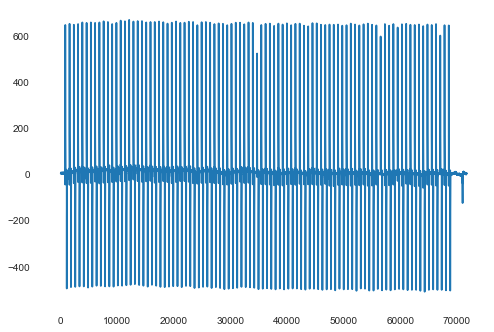

In [3]:
# Рассмотрим канал FD
plt.plot(fd)

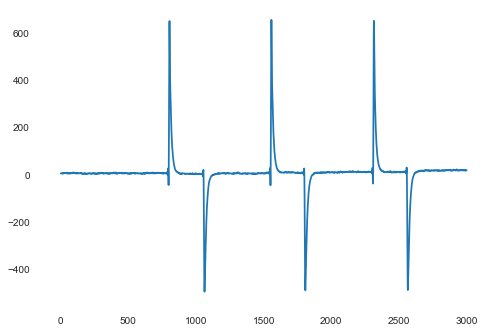

In [4]:
# Визуализируем данные на маленьком интервале
plt.plot(fd[0:3000])
# Наблюдаем пики локальных максимумов и минимумов
# Такие всплески сигнала соответствуют включению синхростимула
# Можно взять интервалы от одного всплеска до другого, то есть от одного появления объекта на экране
# до следующего появления объекта.

In [5]:
count_synchrostimuls = 0
for signal in track:
    if signal[1] == 16000:
        count_synchrostimuls+=1
print('Количество включений синхростимула = ', count_synchrostimuls)

Количество включений синхростимула =  92


In [6]:
_max, _min = pkd.peakdetect(fd, None, 50, 50)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]

In [7]:
print('Количество всплесков на канале FD = ', len(ym))
# Видим, что количество подсчитанных синхростимулов и всплесков на сигнале совпадает
# Однако стоит отметить, что на других файлах есть разница в 1-2 единицы
# Также есть файлы с существенной разницей
# Последние не будем учитывать ввиду их загрязнености, а небольшую разницу будет убирать путем
# Обрезания сигнала
# Таким образом мы пришли к тому, как синхронизировать наши данные

Количество всплесков на канале FD =  92


In [8]:
# Рассмотрим канал EEG
data = eeg.tolist()
labels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5',
             'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2']
df = pd.DataFrame(data, columns=labels)


In [9]:
df.describe()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,T3,C3,...,C4,T4,T5,P3,Pz,P4,T6,O1,Oz,O2
count,71700.000000,71700.00000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,...,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000
mean,41.600030,25.37840,17.780211,-15.173605,-32.884310,16.124653,8.368623,14.024852,-8.098867,47.016403,...,14.384367,20.381053,17.852127,-23.186937,38.372109,-1.165675,36.866245,146.715132,46.105898,40.664498
std,28.625105,24.99265,29.664317,26.670100,28.309118,28.543359,40.056531,27.201845,27.268190,27.337427,...,28.105889,65.089518,25.565429,32.045967,32.332369,26.035953,113.060352,27.273272,53.447482,26.850706
min,-994.875000,-859.00000,-851.375000,-990.125000,-1073.875000,-1098.750000,-969.000000,-651.375000,-1017.375000,-984.875000,...,-1195.125000,-4016.375000,-1018.250000,-1113.750000,-1222.375000,-884.750000,-3975.500000,-777.500000,-967.750000,-1028.375000
25%,28.375000,11.68750,1.187500,-30.562500,-50.750000,-0.625000,-15.687500,-4.437500,-23.812500,29.625000,...,-1.812500,5.937500,0.250000,-38.312500,20.750000,-16.312500,18.125000,131.437500,21.500000,24.812500
50%,40.687500,25.50000,20.437500,-17.187500,-32.875000,17.000000,5.187500,14.312500,-10.812500,44.187500,...,14.687500,21.875000,17.687500,-21.250000,38.875000,-1.062500,34.750000,146.125000,37.875000,38.000000
75%,53.125000,39.00000,34.562500,-3.562500,-15.437500,33.812500,29.250000,31.000000,2.937500,63.312500,...,29.187500,34.187500,34.562500,-4.750000,57.250000,13.937500,51.375000,161.000000,54.562500,53.500000
max,227.000000,192.50000,170.750000,132.687500,100.687500,165.562500,205.375000,152.375000,170.187500,184.437500,...,159.562500,2173.812500,138.062500,99.375000,183.687500,118.687500,3111.187500,298.437500,444.312500,205.312500


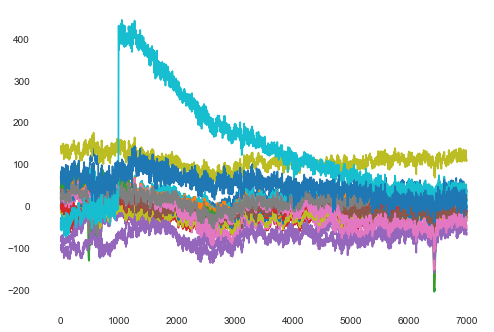

In [18]:
plt.plot(eeg[0:7000])
# Можем видеть непонятные всплески сигнала на графике(выбросы?)

In [31]:
# Организуем датафрейм из данных со всех сигналов
fieldnames = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5',
             'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2', 'ecg', 'pnvm', 'fd']
data = np.hstack((eeg, np.atleast_2d(ecg)))
data = np.hstack((data, np.atleast_2d(pnvm)))
data = np.hstack((data, np.atleast_2d(fd)))
data = data.tolist()
df = pd.DataFrame(data, columns=fieldnames)

In [32]:
df.describe()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,T3,C3,...,P3,Pz,P4,T6,O1,Oz,O2,ecg,pnvm,fd
count,71700.000000,71700.00000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,...,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000
mean,41.600030,25.37840,17.780211,-15.173605,-32.884310,16.124653,8.368623,14.024852,-8.098867,47.016403,...,-23.186937,38.372109,-1.165675,36.866245,146.715132,46.105898,40.664498,412.489317,-0.500530,7.424644
std,28.625105,24.99265,29.664317,26.670100,28.309118,28.543359,40.056531,27.201845,27.268190,27.337427,...,32.045967,32.332369,26.035953,113.060352,27.273272,53.447482,26.850706,1440.772994,17.812473,88.228401
min,-994.875000,-859.00000,-851.375000,-990.125000,-1073.875000,-1098.750000,-969.000000,-651.375000,-1017.375000,-984.875000,...,-1113.750000,-1222.375000,-884.750000,-3975.500000,-777.500000,-967.750000,-1028.375000,-5388.000000,-70.000000,-511.000000
25%,28.375000,11.68750,1.187500,-30.562500,-50.750000,-0.625000,-15.687500,-4.437500,-23.812500,29.625000,...,-38.312500,20.750000,-16.312500,18.125000,131.437500,21.500000,24.812500,-396.000000,-12.000000,2.000000
50%,40.687500,25.50000,20.437500,-17.187500,-32.875000,17.000000,5.187500,14.312500,-10.812500,44.187500,...,-21.250000,38.875000,-1.062500,34.750000,146.125000,37.875000,38.000000,92.500000,-3.000000,6.000000
75%,53.125000,39.00000,34.562500,-3.562500,-15.437500,33.812500,29.250000,31.000000,2.937500,63.312500,...,-4.750000,57.250000,13.937500,51.375000,161.000000,54.562500,53.500000,1165.000000,11.000000,14.000000
max,227.000000,192.50000,170.750000,132.687500,100.687500,165.562500,205.375000,152.375000,170.187500,184.437500,...,99.375000,183.687500,118.687500,3111.187500,298.437500,444.312500,205.312500,8250.000000,110.000000,669.000000


In [43]:
y = track[:,3]
x = track[:,2]

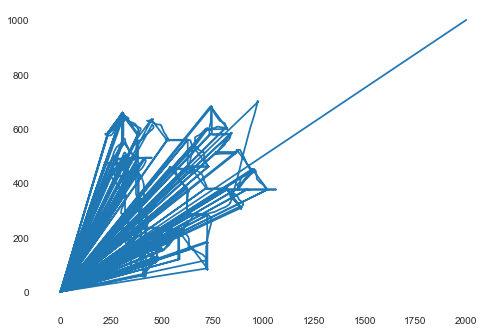

In [44]:
plt.plot(x,y) # Движения курсора мыши в течение всего эксперимента